In [ ]:
pip install numpy matplotlib yfinance scipy

données du S&P 500 :

In [1]:
import yfinance as yf

def get_sp500_data(start_date, end_date):
    """Télécharge les données historiques du S&P 500"""
    sp500 = yf.download('^GSPC', start=start_date, end=end_date)
    return sp500['Close']

start_date = "2020-01-01"
end_date = "2024-12-08"

# Téléchargement des données
sp500_prices = get_sp500_data(start_date, end_date)

# Affichage des premières lignes des données
print(sp500_prices.head())

[*********************100%***********************]  1 of 1 completed

Ticker            ^GSPC
Date                   
2020-01-02  3257.850098
2020-01-03  3234.850098
2020-01-06  3246.280029
2020-01-07  3237.179932
2020-01-08  3253.050049


**Calculer les paramètres** :  le rendement moyen et la volatilité à partir des prix historiques.

In [3]:
import numpy as np

def calculate_parameters(prices):

    log_returns = np.log(prices / prices.shift(1)).dropna()
    mu = log_returns.mean().iloc[0] * 252  # Extraction de la valeur scalaire
    sigma = log_returns.std().iloc[0] * np.sqrt(252)  # Extraction de la valeur scalaire
    return mu, sigma

# Calcul des paramètres
mu, sigma = calculate_parameters(sp500_prices)

# Affichage des résultats
print(f"Rendement moyen (mu) : {mu:.6f}")
print(f"Volatilité (sigma) : {sigma:.6f}")

Rendement moyen (mu) : 0.127041
Volatilité (sigma) : 0.214898


**simuler les trajectoires de prix selon un Mouvement Brownien Géométrique. **

S0: Prix initial de l'actif

mu: Rendement moyen annualisé  
sigma: Volatilité annualisée

T: Période de simulation en années

N: Nombre d'étapes de temps (jours de bourse)

M: Nombre de simulations

In [4]:
def monte_carlo_simulation(S0, mu, sigma, T, N, M):
    mu=mu
    sigma=sigma
    dt = T / N
    prices = np.zeros((N + 1, M))
    prices[0] = S0

    for t in range(1, N + 1):
        Z = np.random.standard_normal(M)
        prices[t] = prices[t - 1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)

    return prices

S0 = sp500_prices.iloc[-1]  # Dernier prix connu
T = 1
N = 252  #(jours de bourse)
M = 1000  # Nombre de simulations

prices = monte_carlo_simulation(S0, mu, sigma, T, N, M)

# Affichage des premières valeurs simulées
print(prices[:5, :5])  # Affichage des 5 premières lignes et colonnes


[[6090.27001953 6090.27001953 6090.27001953 6090.27001953 6090.27001953]
 [6019.12514733 6135.64639297 6016.7375221  6025.48008292 6094.34282305]
 [6001.48634014 6054.72141621 6059.83429236 6001.34446228 6119.34459994]
 [6110.11428326 6154.66894383 6123.33714024 6133.69847128 6166.08209751]
 [6168.61698309 6070.7970765  6008.91182881 5988.97796936 6188.83862942]]


**calculer la VaR :** Calcule la Value at Risk (VaR) à un niveau de confiance donné (ex: 5%).

In [5]:
def value_at_risk(prices, alpha=0.05):

    final_prices = prices[-1, :]
    initial_prices = prices[0, :]

    returns = (final_prices / initial_prices) - 1
    var = np.percentile(returns, alpha * 100)  # Calcul du quantile alpha%

    return var

var_95 = value_at_risk(prices, alpha=0.05)

# Affichage du résultat
print(f"Value at Risk (5%) : {var_95:.2%}")

Value at Risk (5%) : -23.22%


afficher les trajectoires simulées :

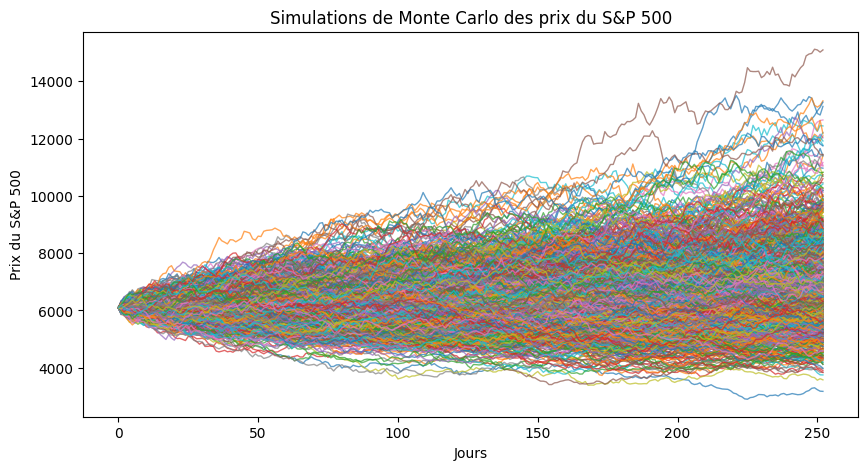

In [6]:
import matplotlib.pyplot as plt

def plot_simulation(prices):
    """Affiche les trajectoires simulées du prix de l'actif."""
    plt.figure(figsize=(10, 5))
    plt.plot(prices, lw=1, alpha=0.7)  # Affichage de toutes les simulations
    plt.title("Simulations de Monte Carlo des prix du S&P 500")
    plt.xlabel("Jours")
    plt.ylabel("Prix du S&P 500")
    plt.show()

# Affichage du graphique
plot_simulation(prices)


Ce graphique représente une simulation de Monte Carlo du S&P 500 sur 252 jours (environ un an). Chaque ligne correspond à une trajectoire possible de l’évolution du prix, en tenant compte de la volatilité et des rendements historiques.

L’objectif est d’explorer différents scénarios de marché :

Certaines simulations montrent une hausse, d’autres une baisse, reflétant l’incertitude des marchés financiers.
Plus les trajectoires s’éloignent, plus la dispersion des prix est grande, ce qui indique un risque accru.

Analyse des résultats


  **Analyse des risques du S&P 500 :**
     
Volatilité des rendements journaliers
     
Drawdown maximal
     
Distribution des rendements cumulés

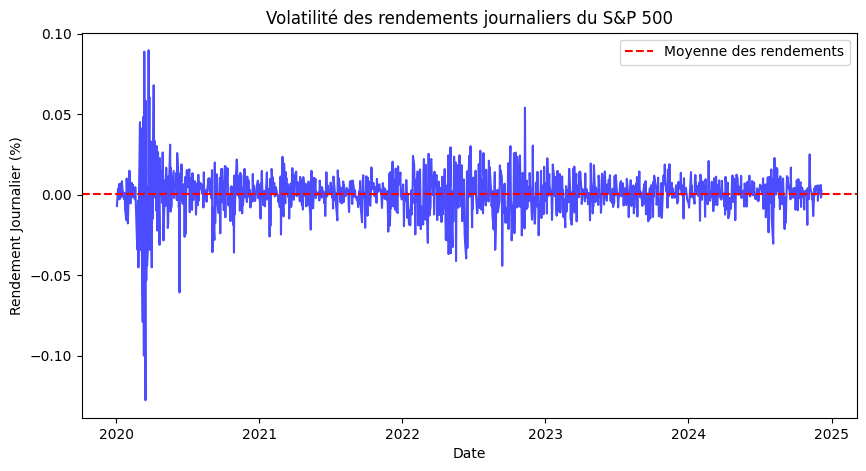

 Graphique 1 : Volatilité des Rendements Journaliers
- Les pics élevés signalent des périodes de forte incertitude ou de crise financière.
- Une volatilité élevée implique un risque accru.



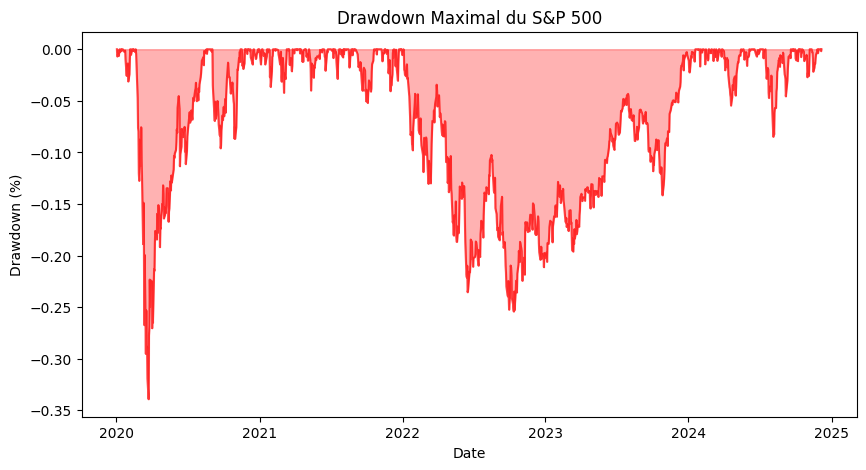

 Graphique 2 : Drawdown Maximal (Pire baisse historique)
- La pire baisse historique observée est de -33.92%.
- Une perte élevée signale des crises de marché comme 2008 ou 2020.



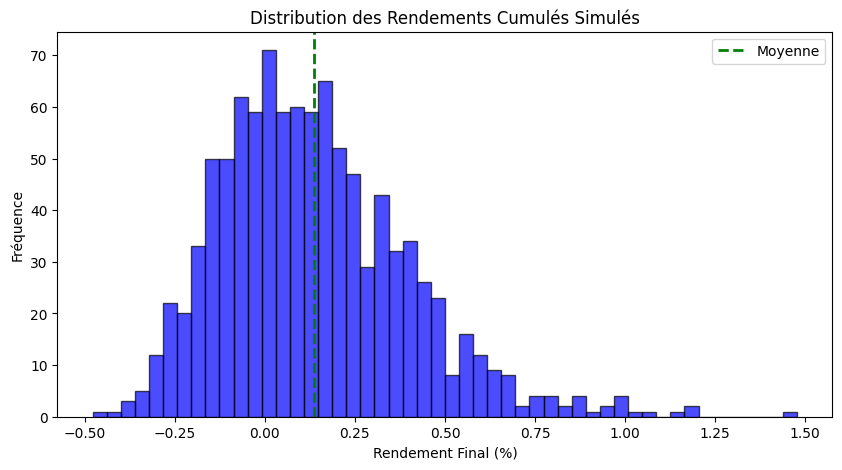

Graphique 3 : Distribution des Rendements Cumulés
- Une large dispersion signifie une forte incertitude quant aux gains ou pertes.
- Un marché plus risqué aura une distribution asymétrique avec de fortes baisses potentielles.



In [27]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_risk_factors(prices, sp500_prices):


 # Convertir en Series
    if isinstance(sp500_prices, pd.DataFrame):
        sp500_prices = sp500_prices.squeeze()

    #  FIGURE 1 : Volatilité des rendements journaliers
    log_returns = np.log(sp500_prices / sp500_prices.shift(1)).dropna()

    plt.figure(figsize=(10, 5))
    plt.plot(log_returns, color="blue", alpha=0.7)
    plt.axhline(y=log_returns.mean(), color="red", linestyle="dashed", label="Moyenne des rendements")
    plt.title("Volatilité des rendements journaliers du S&P 500")
    plt.xlabel("Date")
    plt.ylabel("Rendement Journalier (%)")
    plt.legend()
    plt.show()

    print(" Graphique 1 : Volatilité des Rendements Journaliers")
    print("- Les pics élevés signalent des périodes de forte incertitude ou de crise financière.")
    print("- Une volatilité élevée implique un risque accru.\n")

    #  FIGURE 2 : Drawdown maximal (Perte maximale depuis un sommet)
    cumulative_returns = (sp500_prices / sp500_prices.iloc[0]) - 1  # Rendements cumulés
    running_max = np.maximum.accumulate(sp500_prices)  # Maximum atteint
    drawdown = (sp500_prices / running_max) - 1  # Drawdown en %

    plt.figure(figsize=(10, 5))
    plt.plot(drawdown, color="red", alpha=0.7)
    plt.fill_between(drawdown.index, drawdown, color="red", alpha=0.3)
    plt.title("Drawdown Maximal du S&P 500")
    plt.xlabel("Date")
    plt.ylabel("Drawdown (%)")
    plt.show()

    max_drawdown = drawdown.min()
    print(" Graphique 2 : Drawdown Maximal (Pire baisse historique)")
    print(f"- La pire baisse historique observée est de {max_drawdown:.2%}.")
    print("- Une perte élevée signale des crises de marché comme 2008 ou 2020.\n")

    #  FIGURE 3 : Distribution des rendements cumulés
    simulated_returns = (prices[-1, :] / prices[0, :]) - 1  # Rendements finaux simulés

    plt.figure(figsize=(10, 5))
    plt.hist(simulated_returns, bins=50, alpha=0.7, color='blue', edgecolor='black')
    plt.axvline(np.mean(simulated_returns), color='green', linestyle='dashed', linewidth=2, label='Moyenne')
    plt.title("Distribution des Rendements Cumulés Simulés")
    plt.xlabel("Rendement Final (%)")
    plt.ylabel("Fréquence")
    plt.legend()
    plt.show()

    print("Graphique 3 : Distribution des Rendements Cumulés")
    print("- Une large dispersion signifie une forte incertitude quant aux gains ou pertes.")
    print("- Un marché plus risqué aura une distribution asymétrique avec de fortes baisses potentielles.\n")


# Exécution de l'analyse des risques
analyze_risk_factors(prices, sp500_prices)


**Résumé des risques du S&P 500**


**Volatilité élevée** → fluctuations importantes, signe d’un marché incertain."
     
**Drawdown maximal** →  montre les périodes de pertes maximales du S&P 500 par rapport aux sommets historiques avec une forte chute en 2020 atteignant environ moins trente pour cent. Plus les drawdowns sont longs et profonds plus la récupération du marché est lente

     
**Distribution des rendements** →
 représente la distribution des rendements futurs simulés avec une majorité des scénarios concentrés autour de la moyenne marquée par une ligne verte. La présence de fortes baisses possibles indique un risque asymétrique sur le marché